In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
%matplotlib inline

In [6]:
diabetes_dataset = pd.read_csv("D:\\vit mca\\2nd sem\\sem 2\\Data Mining and Bussiness Intelligence\\j component\\diabetes (1).csv")
df=pd.read_csv("D:\\vit mca\\2nd sem\\sem 2\\Data Mining and Bussiness Intelligence\\j component\\diabetes (1).csv")

In [7]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [8]:
diabetes_dataset.head(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
print(diabetes_dataset['Glucose'])

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


In [12]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='SkinThickness'>

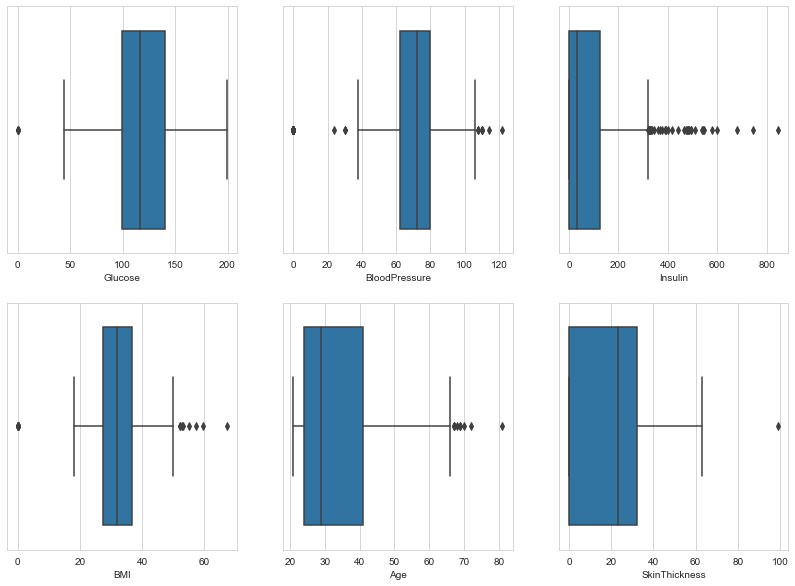

In [13]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=diabetes_dataset)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=diabetes_dataset)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=diabetes_dataset)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=diabetes_dataset)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=diabetes_dataset)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=diabetes_dataset)

In [14]:
diabetes_dataset.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [15]:
print(diabetes_dataset.isnull().sum())
print()
print()
print(diabetes_dataset.isnull().any())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [16]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

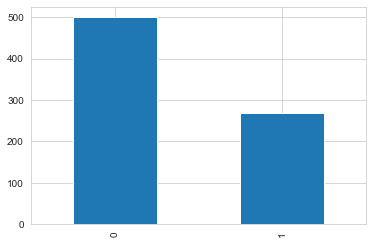

In [17]:
p=diabetes_dataset.Outcome.value_counts().plot(kind="bar")

In [18]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


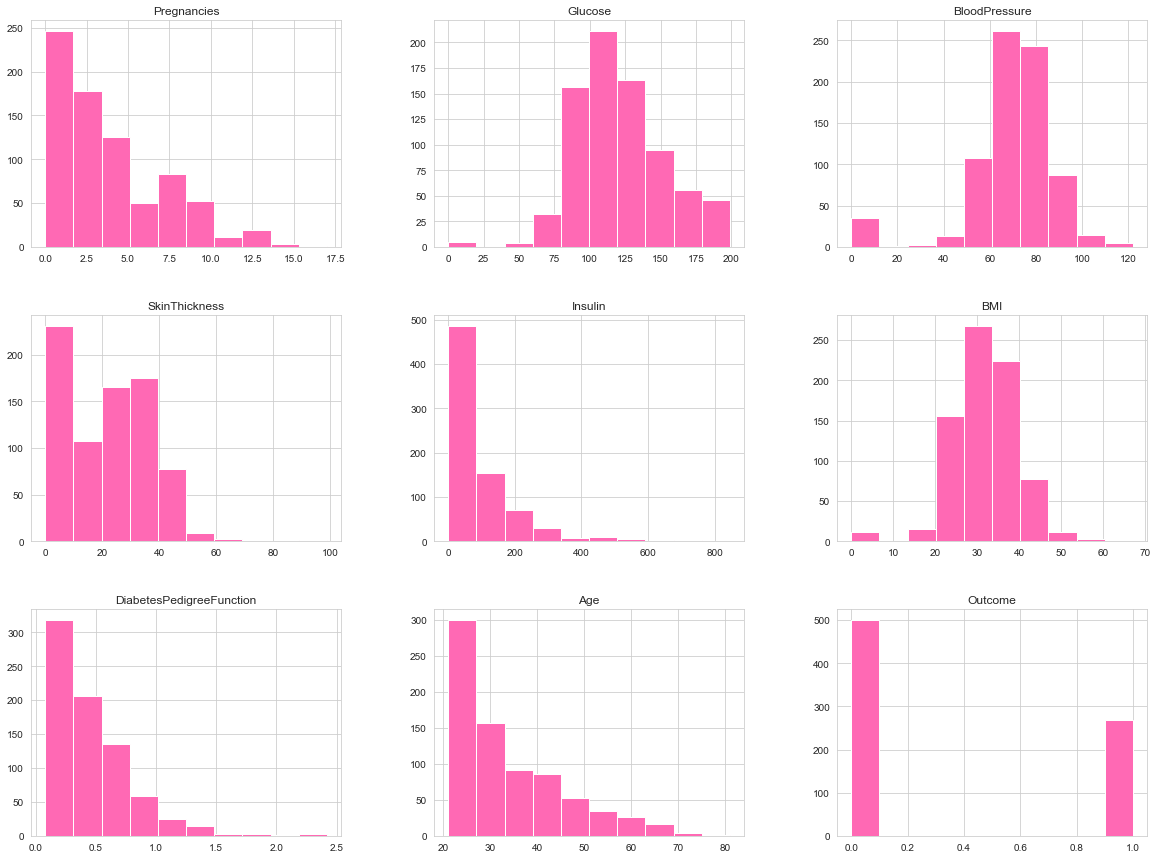

In [19]:
diabetes_dataset.hist(figsize=(20,15), color="hotpink")
plt.show()

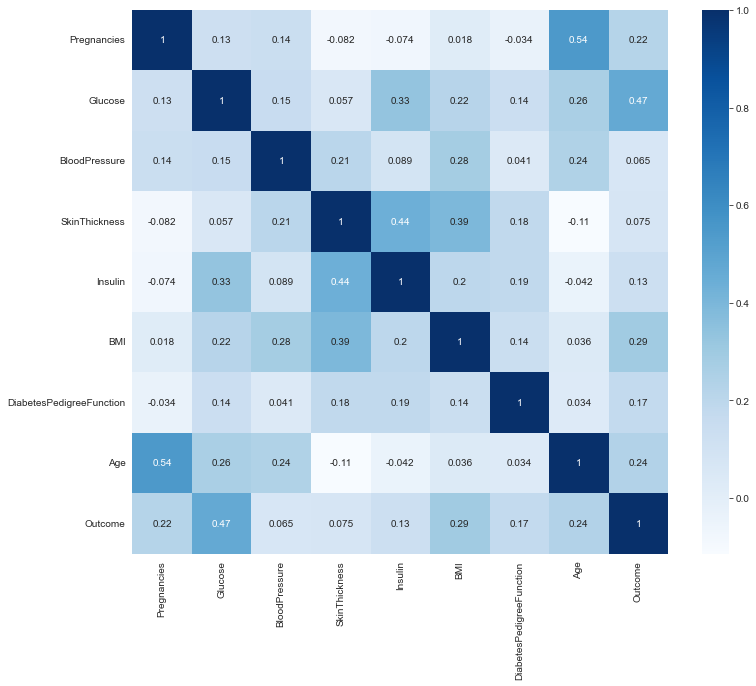

In [20]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_dataset.corr(),annot=True,cmap='Blues')

In [21]:
df_without_outcome=df.drop("Outcome",axis=1)

In [22]:
scaler=StandardScaler()
scaler.fit(df_without_outcome)

StandardScaler()

In [23]:
sclaed_data=scaler.transform(df_without_outcome)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [26]:
pca.fit(sclaed_data)

PCA(n_components=2)

In [27]:
x_pca=pca.transform(sclaed_data)

Text(0, 0.5, 'Second Principal Component')

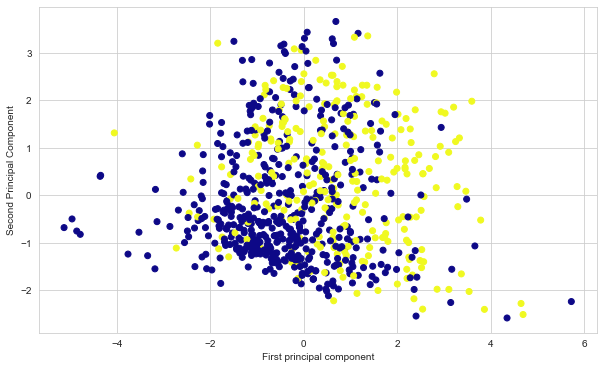

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df["Outcome"],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [29]:
pca.components_

array([[ 0.1284321 ,  0.39308257,  0.36000261,  0.43982428,  0.43502617,
         0.45194134,  0.27061144,  0.19802707],
       [ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
        -0.1009598 , -0.122069  ,  0.62058853]])

<AxesSubplot:>

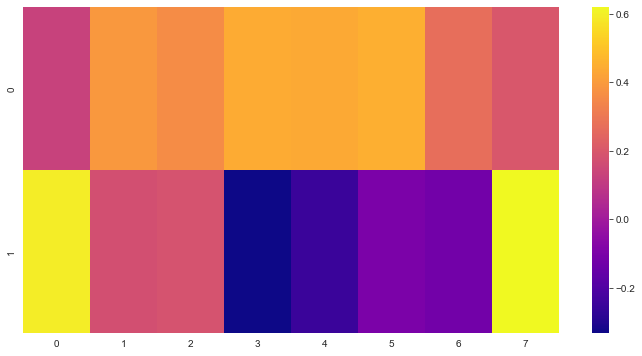

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(pca.components_,cmap='plasma')

Text(0, 0.5, 'variance %')

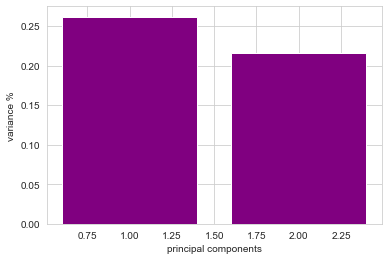

In [31]:
pc=range(1,pca.n_components_+1)
plt.bar(pc,pca.explained_variance_ratio_,color='purple')
plt.xlabel('principal components')
plt.ylabel('variance %')

In [32]:
pca=PCA(n_components=3)

In [33]:
pca.fit(sclaed_data)

PCA(n_components=3)

In [34]:
x_pca=pca.transform(sclaed_data)

In [35]:
pca.components_

array([[ 0.1284321 ,  0.39308257,  0.36000261,  0.43982428,  0.43502617,
         0.45194134,  0.27061144,  0.19802707],
       [ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
        -0.1009598 , -0.122069  ,  0.62058853],
       [-0.01308692,  0.46792282, -0.53549442, -0.2376738 ,  0.33670893,
        -0.36186463,  0.43318905,  0.07524755]])

<AxesSubplot:>

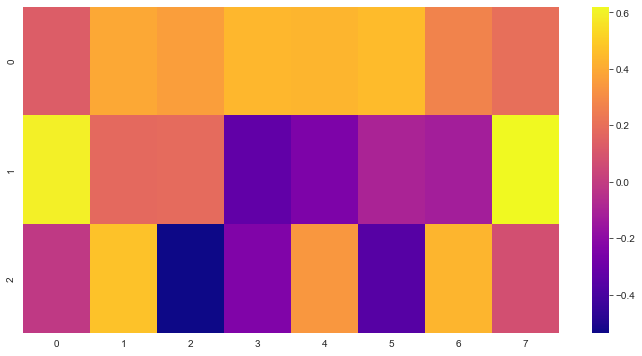

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(pca.components_,cmap='plasma')

Text(0, 0.5, 'variance %')

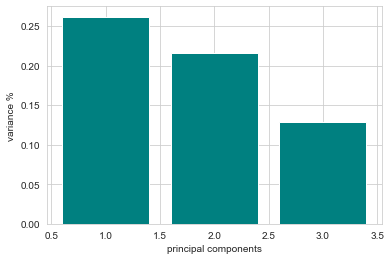

In [37]:
pc=range(1,pca.n_components_+1)
plt.bar(pc,pca.explained_variance_ratio_,color='teal')
plt.xlabel('principal components')
plt.ylabel('variance %')

In [38]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [39]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [40]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [41]:
sclaer=StandardScaler()

In [42]:
standardized_data=scaler.fit_transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [43]:
x=standardized_data
y=diabetes_dataset['Outcome']

In [44]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [45]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)
# using stratify for same proportion
# all the diabetic cases may go to xtrain or xtest

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (537, 8) (231, 8)


In [48]:
classifier=svm.SVC(kernel='linear')

In [49]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy score : ', training_data_accuracy)

accuracy score :  0.7821229050279329


In [51]:
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy score : ', testing_data_accuracy)

accuracy score :  0.7748917748917749


In [52]:
input_data = (4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array=np.asarray(input_data)

In [53]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]


In [54]:
prediction=classifier.predict(std_data)
print(prediction)

[0]


In [55]:
input_data = (10,168,74,0,0,38,0.537,34)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]


In [56]:
prediction=classifier.predict(std_data)
print(prediction)

[1]


In [57]:
if prediction[0]==0:
    print('not diabetic')
else:
    print('diabetic')

diabetic


In [58]:
# maxa=0
# j=0
# k=0
# maxb=0
# blah=0

# for i in range(1,4000):
#     x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=i)
#     classifier=svm.SVC(kernel='linear')
#     classifier.fit(x_train,y_train)
#     x_train_prediction=classifier.predict(x_train)
#     training_data_accuracy=accuracy_score(x_train_prediction,y_train)
#    # print('For ',i,' accuracy score : ', training_data_accuracy)
#     if(training_data_accuracy>maxa):
#         maxa=training_data_accuracy
#         j=i
#     x_test_prediction=classifier.predict(x_test)
#     testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
#     #print('accuracy score : ', testing_data_accuracy)
#     if(testing_data_accuracy>maxb):
#         maxb=testing_data_accuracy
#         k=i
    
    

# print("Training data acc ",j," ",maxa)
# print("Testing data acc ",k," ",maxb)



In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2416)
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy score : ', training_data_accuracy)
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy score : ', testing_data_accuracy)

accuracy score :  0.762214983713355
accuracy score :  0.8506493506493507
